In [17]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load the dataset

In [2]:
import pandas as pd
df=pd.read_csv('dataset.csv')

# Step 1: Basic Information

In [3]:
# Information Found: 
# The dataset contains 3000 rows and 16 columns.The columns include both numerical (int64) and categorical (object) data types.
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 3000 non-null   object
 1   AGE                    3000 non-null   int64 
 2   SMOKING                3000 non-null   int64 
 3   YELLOW_FINGERS         3000 non-null   int64 
 4   ANXIETY                3000 non-null   int64 
 5   PEER_PRESSURE          3000 non-null   int64 
 6   CHRONIC_DISEASE        3000 non-null   int64 
 7   FATIGUE                3000 non-null   int64 
 8   ALLERGY                3000 non-null   int64 
 9   WHEEZING               3000 non-null   int64 
 10  ALCOHOL_CONSUMING      3000 non-null   int64 
 11  COUGHING               3000 non-null   int64 
 12  SHORTNESS_OF_BREATH    3000 non-null   int64 
 13  SWALLOWING_DIFFICULTY  3000 non-null   int64 
 14  CHEST_PAIN             3000 non-null   int64 
 15  LUNG_CANCER          

# Step 2: Display the first few rows

In [21]:
# Information Found: 
# Most of the columns are already label encoded except for the 'Gender' column which contains categorical data classifying Gender, 
# and the 'Age' column which contains the ages in integer values.
df_head = df.head()
print(df_head)


  GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0      M   65        1               1        1              2   
1      F   55        1               2        2              1   
2      F   78        2               2        1              1   
3      M   60        2               1        1              1   
4      F   80        1               1        2              1   

   CHRONIC_DISEASE  FATIGUE  ALLERGY  WHEEZING  ALCOHOL_CONSUMING  COUGHING  \
0                2        1        2         2                  2         2   
1                1        2        2         2                  1         1   
2                1        2        1         2                  1         1   
3                2        1        2         1                  1         2   
4                1        2        1         2                  1         1   

   SHORTNESS_OF_BREATH  SWALLOWING_DIFFICULTY  CHEST_PAIN LUNG_CANCER  
0                    2                      2           

# Step 3: Check for missing values

In [6]:
# Information Found: There are no missing values in the dataset, which greatly increases the usability and quality of this dataset.
missing_values = df.isnull().sum()
missing_values_non_zero = missing_values[missing_values > 0]
print(missing_values_non_zero)

Series([], dtype: int64)


# Step 4: Descriptive Statistics

In [ ]:
#Information Found:-
# Age: Mean=55.17, Std=14.72, Range=30-80; centered around 55, showing a moderately wide spread.
# Binary Features (e.g., Smoking, Anxiety): Mean ~1.5, Median=1, nearly balanced (1=No, 2=Yes).
# Most features: 25% of individuals score 1 (No), and 75% score 2 (Yes).
# Dataset is balanced across binary features, reducing bias risk in models.
# Age distribution suggests a middle-aged to older population.

In [7]:
desc_stats = df.describe()
print(desc_stats)

               AGE      SMOKING  YELLOW_FINGERS      ANXIETY  PEER_PRESSURE  \
count  3000.000000  3000.000000     3000.000000  3000.000000    3000.000000   
mean     55.169000     1.491000        1.514000     1.494000       1.499000   
std      14.723746     0.500002        0.499887     0.500047       0.500082   
min      30.000000     1.000000        1.000000     1.000000       1.000000   
25%      42.000000     1.000000        1.000000     1.000000       1.000000   
50%      55.000000     1.000000        2.000000     1.000000       1.000000   
75%      68.000000     2.000000        2.000000     2.000000       2.000000   
max      80.000000     2.000000        2.000000     2.000000       2.000000   

       CHRONIC_DISEASE      FATIGUE      ALLERGY     WHEEZING  \
count      3000.000000  3000.000000  3000.000000  3000.000000   
mean          1.509667     1.489667     1.506667     1.497333   
std           0.499990     0.499977     0.500039     0.500076   
min           1.000000     1

# Step 5: Data Types and Unique Values

In [8]:
# Information Found: GENDER and LUNG_CANCER are categorical columns.
print(df.dtypes)


GENDER                   object
AGE                       int64
SMOKING                   int64
YELLOW_FINGERS            int64
ANXIETY                   int64
PEER_PRESSURE             int64
CHRONIC_DISEASE           int64
FATIGUE                   int64
ALLERGY                   int64
WHEEZING                  int64
ALCOHOL_CONSUMING         int64
COUGHING                  int64
SHORTNESS_OF_BREATH       int64
SWALLOWING_DIFFICULTY     int64
CHEST_PAIN                int64
LUNG_CANCER              object
dtype: object


In [9]:
# Unique values in categorical columns
# Unique values in GENDER: ['M', 'F']
# Unique values in LUNG_CANCER: ['YES', 'NO']
categorical_columns = df.select_dtypes(include=['object']).columns
unique_values = {col: df[col].unique() for col in categorical_columns}
print(unique_values)


{'GENDER': array(['M', 'F'], dtype=object), 'LUNG_CANCER': array(['NO', 'YES'], dtype=object)}


# Step 6: Correlation Analysis

In [14]:
# Information Found:Most numerical features have very low correlations with each other.
# The highest correlation is between WHEEZING and ALCOHOL_CONSUMING, but it's still very low (-0.004093).
correlation_matrix = df.corr(numeric_only=True)
print(correlation_matrix)

                            AGE   SMOKING  YELLOW_FINGERS   ANXIETY  \
AGE                    1.000000 -0.020289        0.016101  0.030051   
SMOKING               -0.020289  1.000000       -0.001497 -0.055562   
YELLOW_FINGERS         0.016101 -0.001497        1.000000  0.012342   
ANXIETY                0.030051 -0.055562        0.012342  1.000000   
PEER_PRESSURE          0.003850 -0.032041        0.011394 -0.024692   
CHRONIC_DISEASE       -0.025655  0.045697       -0.013216  0.016903   
FATIGUE               -0.002322  0.019635       -0.010761 -0.006250   
ALLERGY                0.024915  0.004908       -0.005709 -0.001174   
WHEEZING              -0.018212  0.000571        0.004151 -0.016065   
ALCOHOL_CONSUMING     -0.020704  0.003022        0.027167 -0.001542   
COUGHING              -0.024909  0.011722        0.010076 -0.017082   
SHORTNESS_OF_BREATH   -0.015873 -0.015772       -0.034018 -0.034967   
SWALLOWING_DIFFICULTY -0.001688 -0.001706        0.018590  0.033762   
CHEST_

# Step 7: Data Visualization


In [ ]:
# Information Found:
# Distribution of Numerical Features
# Age Distribution: The histogram of age is fairly symmetric, centered around the mean of 55 years. 
# The age group of 40-70 years is most prevalent, indicating that the dataset primarily consists of middle-aged to older adults.
# Binary Features: The histograms for binary features (like Smoking, Anxiety, etc.) show two distinct peaks 
# corresponding to the values 1 and 2. The nearly equal height of these peaks suggests a balanced distribution 
# between individuals with and without the corresponding condition or behavior.

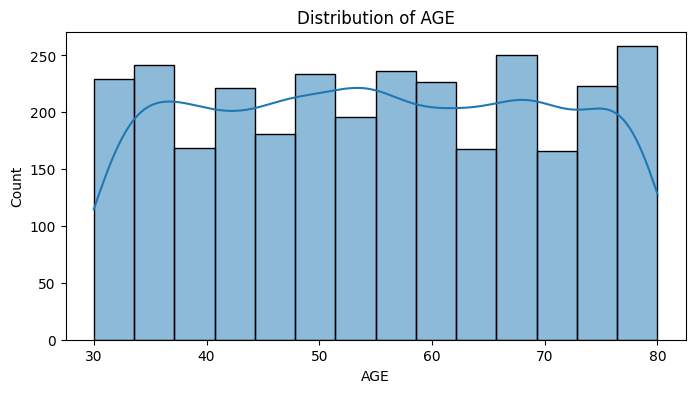

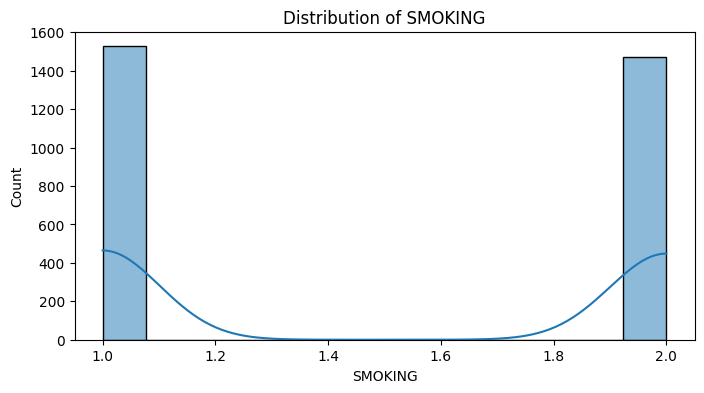

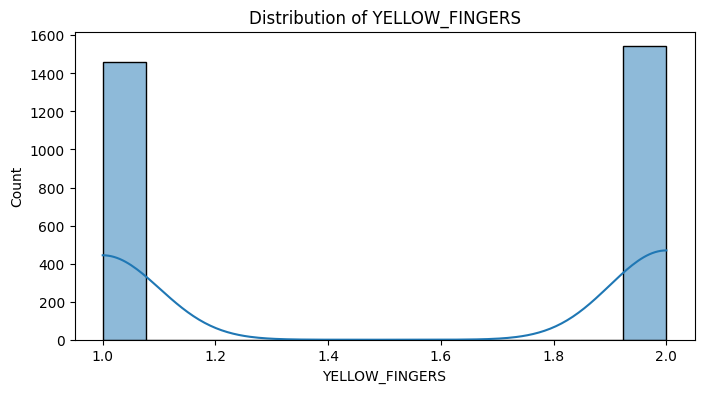

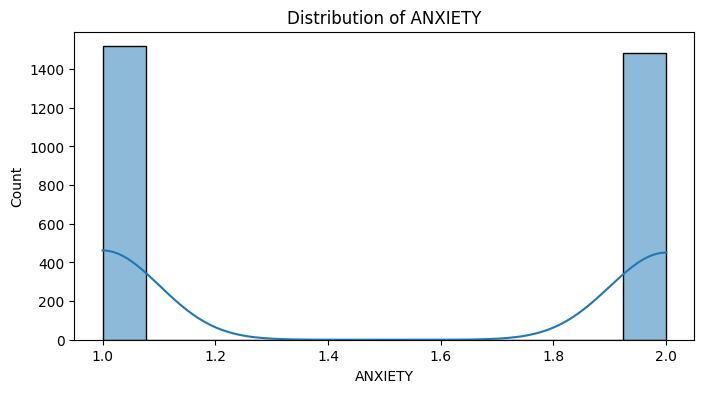

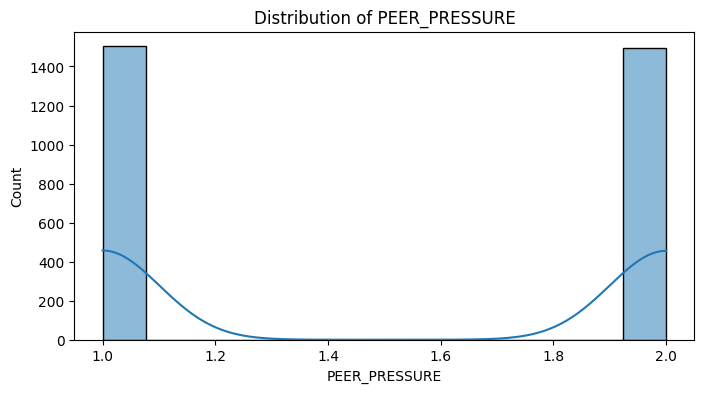

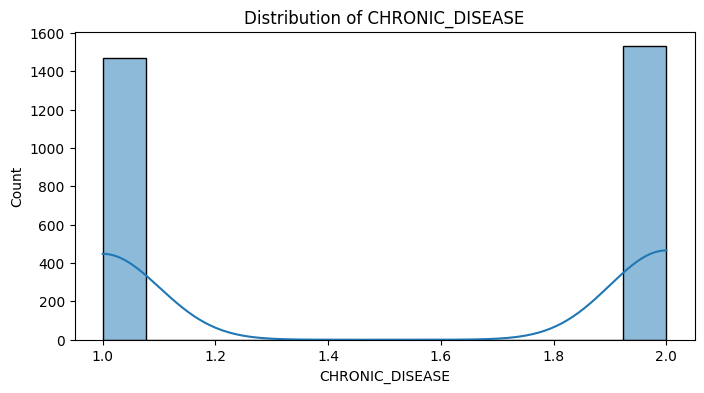

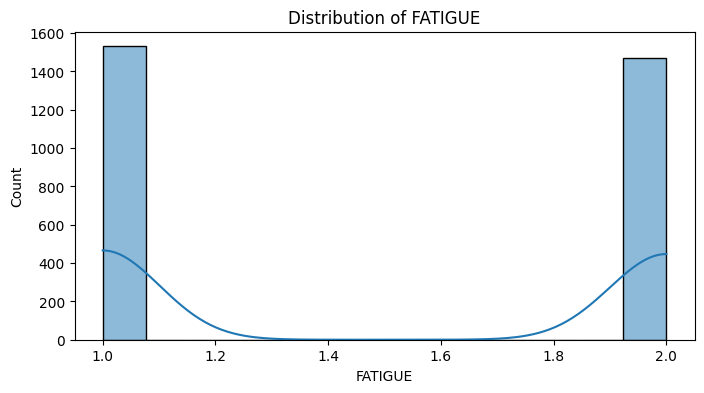

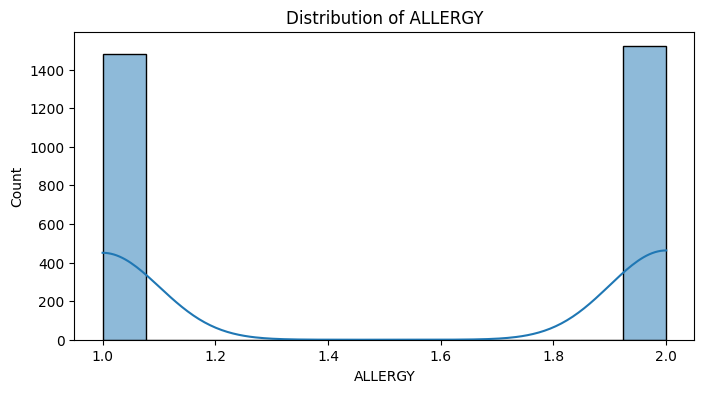

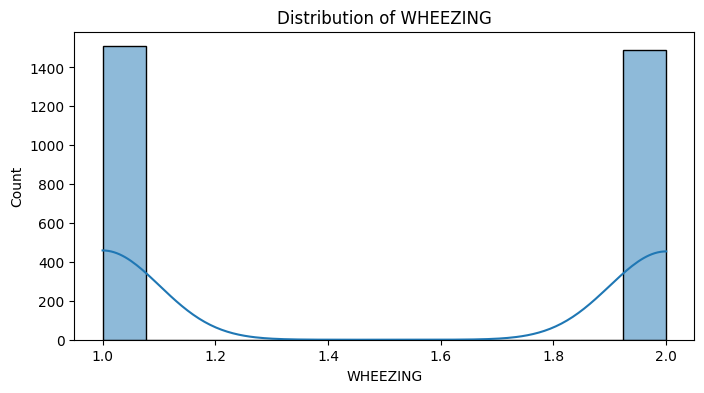

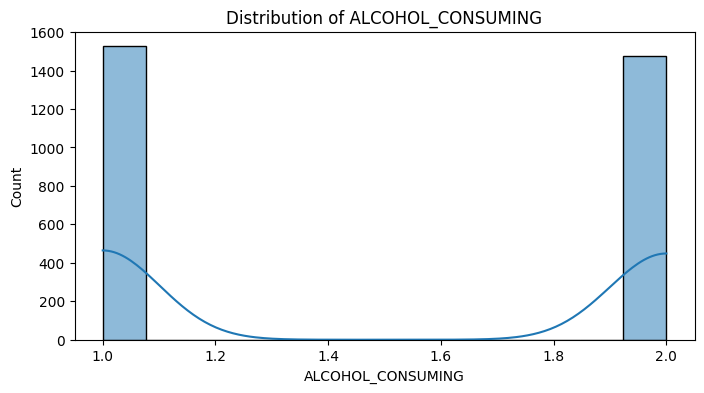

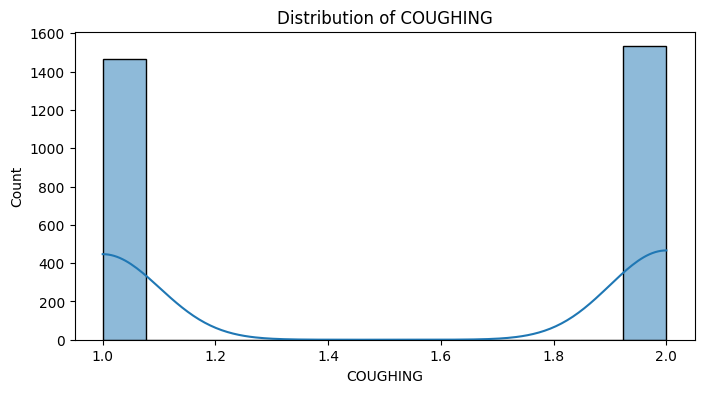

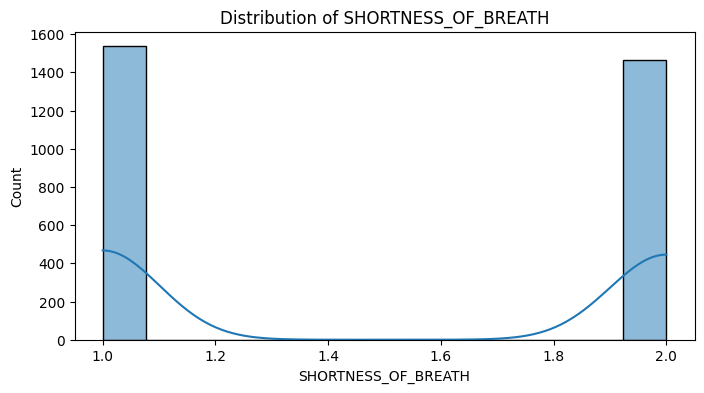

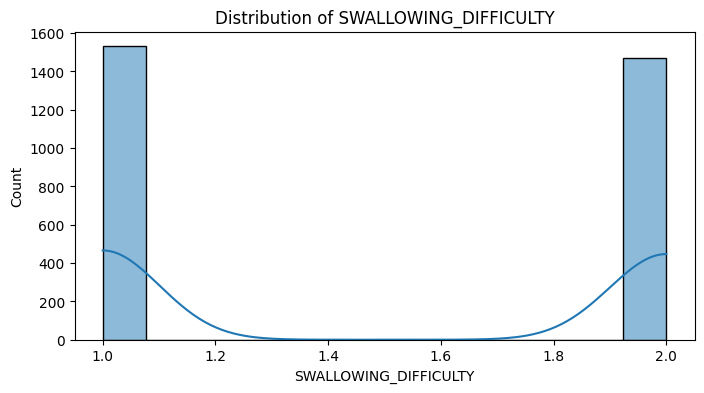

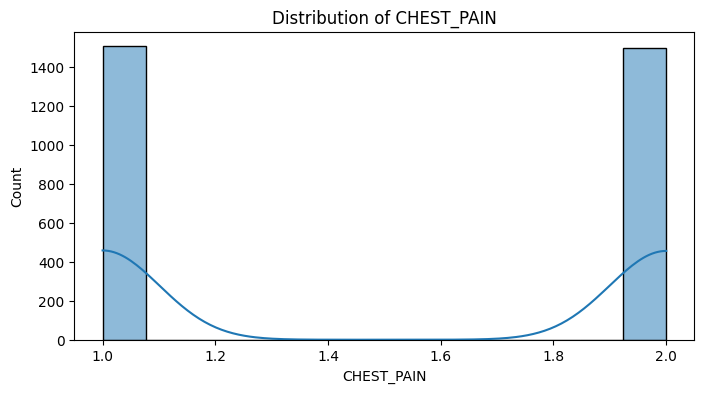

In [18]:
# Distribution of Numerical Features
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

In [ ]:
# Information Found:
# Pairplot for Numerical Features
# Scatter Patterns: The pairplot shows scatter patterns for pairs of numerical features, revealing the relationships between them. 
# For most pairs, the data points are spread out evenly without any obvious linear correlation, suggesting weak or no relationships between the features.
# Clusters: The data tends to form two clusters in most pairwise comparisons, corresponding to the binary nature of many features (e.g., Smoking, Anxiety).

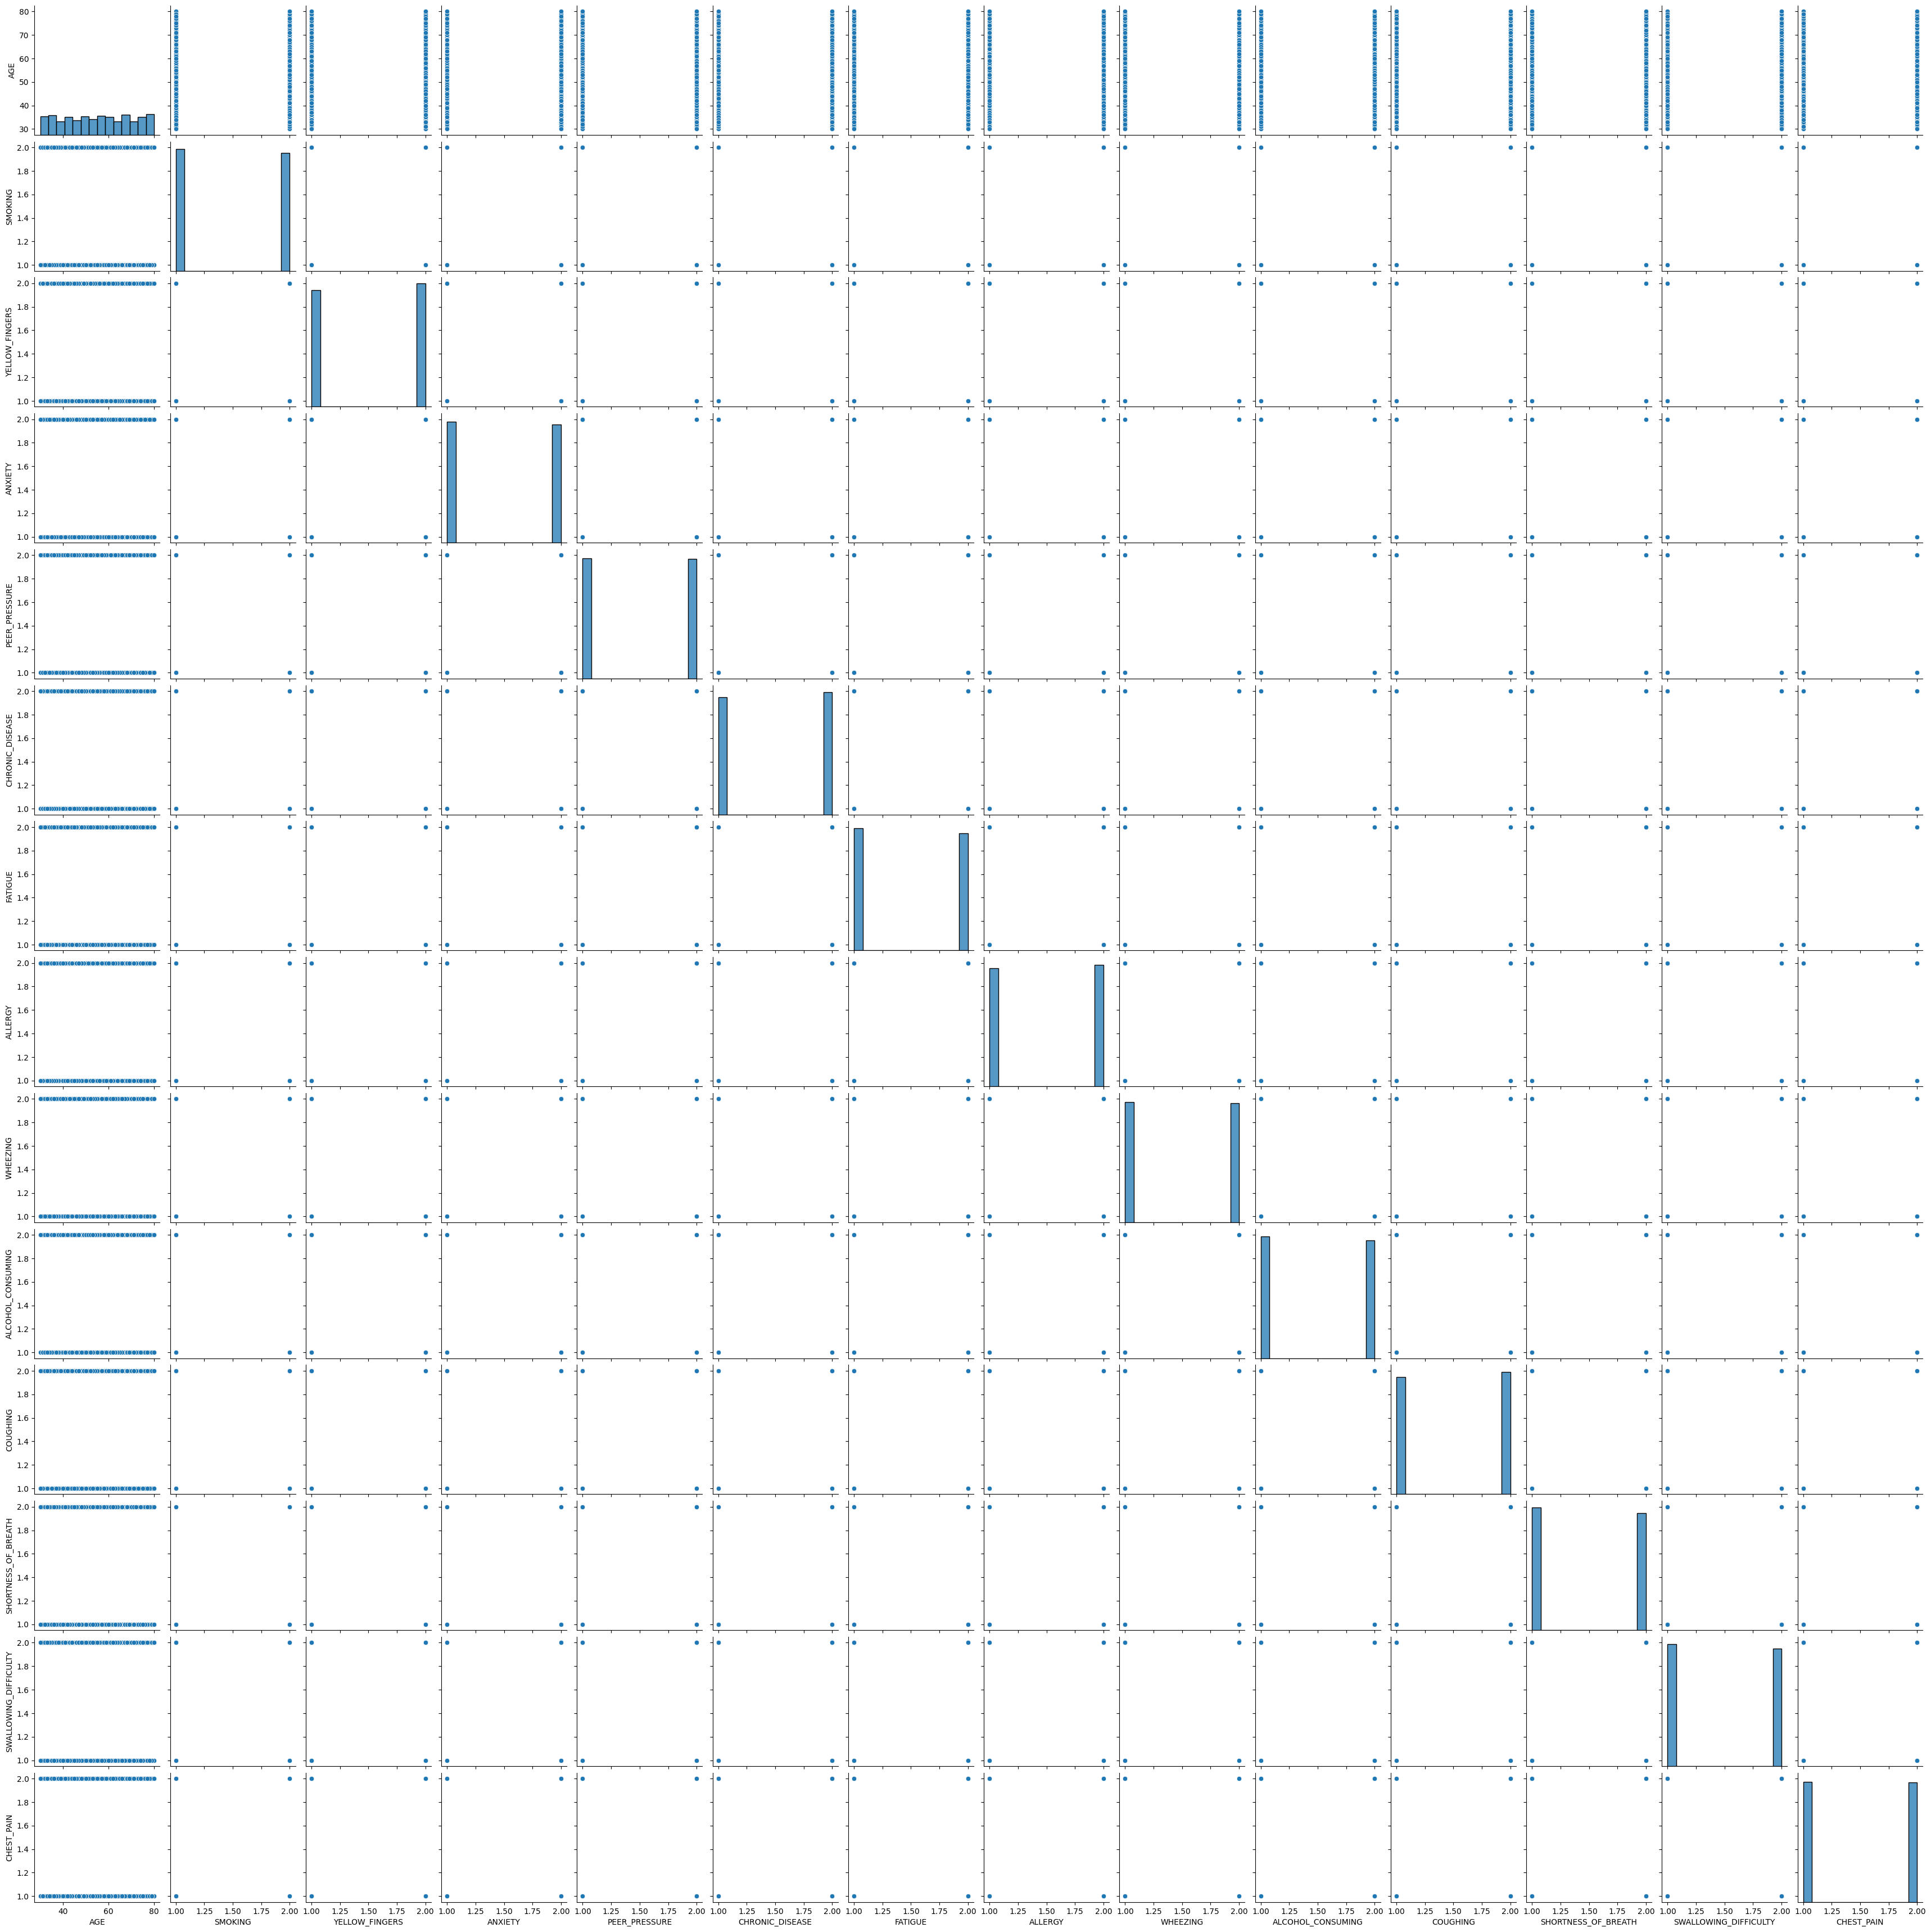

In [19]:
# Pairplot for Numerical Features
pairplot_fig = sns.pairplot(df[numerical_columns])
plt.show()

In [ ]:
# Information Found:
# Correlation Matrix Heatmap
# Low Correlation: The heatmap indicates that most numerical features have very low correlations with each other. 
# This suggests that there is minimal multicollinearity in the dataset, which is beneficial for predictive modeling 
# as it implies that the features provide unique information.
# No Strong Relationships: No pair of features exhibits a strong positive or negative correlation, meaning that these features 
# do not move together strongly, which can be advantageous for building diverse and independent models.

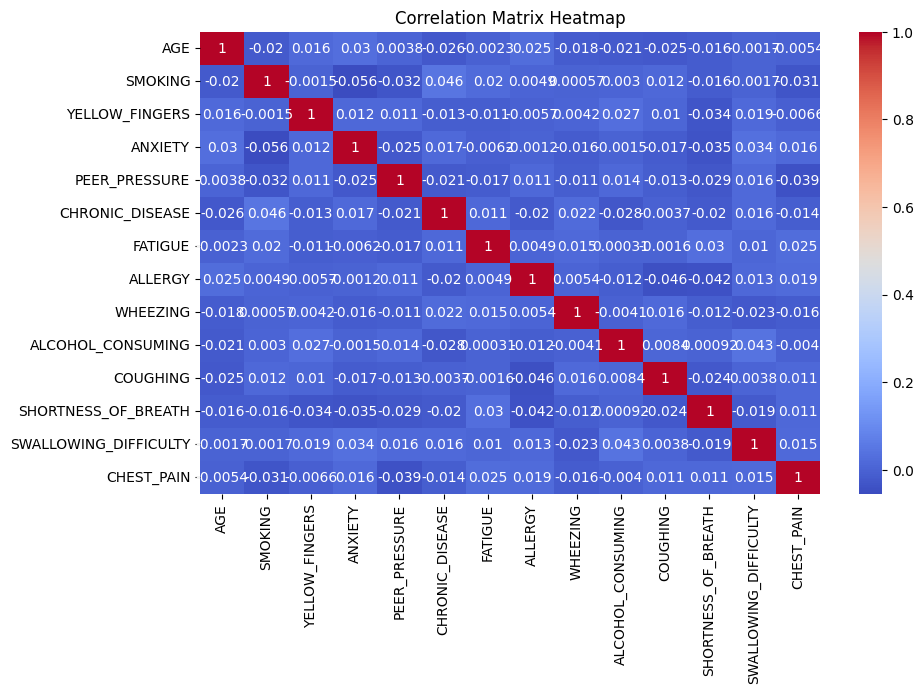

In [20]:
# Heatmap of Correlation Matrix
plt.figure(figsize=(10, 6))
heatmap_fig = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()